## Code làm bình thường

### Cài đặt thư viện cần thiết

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Đọc và xử lý dữ liệu

#### Đọc dữ liệu

In [28]:
df = pd.read_csv("/content/Automobile.csv")

#### Hiển thị 5 dòng đầu

#### Xử lý giá trị thiếu (nếu có)

In [30]:
df = df.replace('?', pd.NA)
df = df.dropna()

#### Ép kiểu cột về đúng dạng

In [31]:
df['horsepower'] = df['horsepower'].astype(float)

#### Mã hóa nhãn cho 'origin'

In [32]:
label_encoder = LabelEncoder()
df['origin'] = label_encoder.fit_transform(df['origin'])  # 0: europe, 1: japan, 2: usa

#### Dataset sau khi xóa tên xe

In [33]:
print(df.head())

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year  origin  
0    3504          12.0          70       2  
1    3693          11.5          70       2  
2    3436          11.0          70       2  
3    3433          12.0          70       2  
4    3449          10.5          70       2  


#### Trực quan hóa dữ liệu

#### Bar chart: số lượng xe theo origin

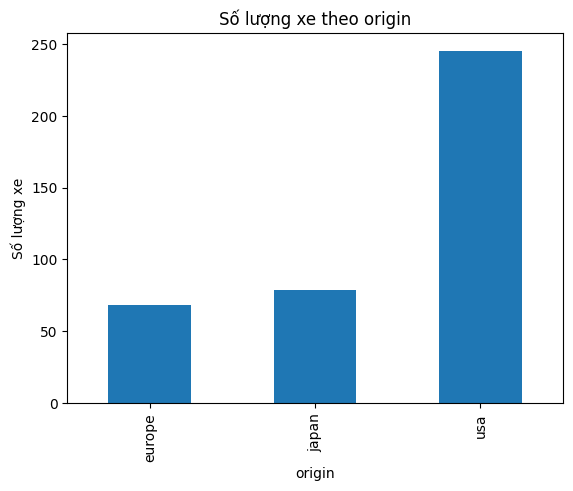

In [34]:
# Mapping
label_encoder.classes_ = ['europe', 'japan', 'usa']

# Bar chart
df['origin'].value_counts().sort_index().plot(
    kind='bar', title='Số lượng xe theo origin'
)
plt.xticks(ticks=[0, 1, 2], labels=['europe', 'japan', 'usa'])  # chỉnh theo đúng mapping
plt.ylabel("Số lượng xe")
plt.show()

#### Pie chart: tỉ lệ origin

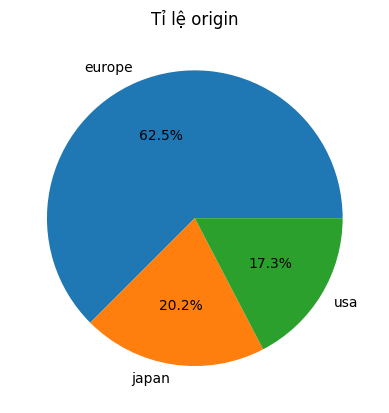

In [35]:
df['origin'].value_counts().plot(kind='pie', labels=label_encoder.classes_, autopct='%1.1f%%', title='Tỉ lệ origin')
plt.ylabel("")
plt.show()

#### Scatter plot: ví dụ giữa horsepower và weight, tô màu theo origin

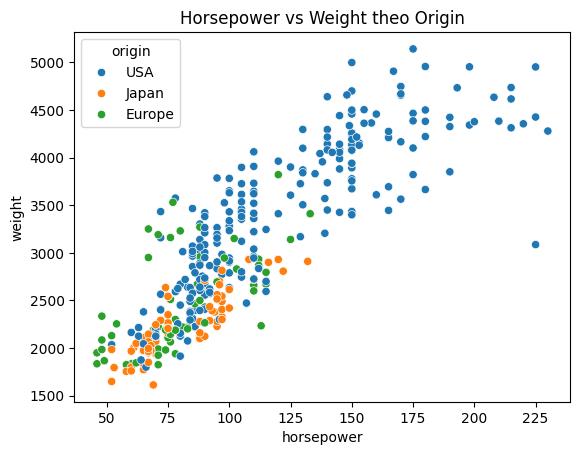

In [36]:
sns.scatterplot(data=df, x='horsepower', y='weight', hue=df['origin'].map({0:'Europe', 1:'Japan', 2:'USA'}))
plt.title("Horsepower vs Weight theo Origin")
plt.show()

#### Chia dữ liệu

In [37]:
X = df.drop('origin', axis=1)
y = df['origin']

#### Chuẩn hóa dữ liệu

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'chevrolet chevelle malibu'

#### Chia train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

#### Đánh giá mô hình

In [ ]:
# Khởi tạo các mô hình
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Huấn luyện và đánh giá
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds, target_names=label_encoder.classes_))

## Sử dụng GridSearchCV

### Gọi thư viện và dataset, tiền xử lí dữ liệu

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Đọc dữ liệu

In [40]:
df = pd.read_csv('/content/Automobile.csv')

#### Hiển thị 5 dòng đầu

In [41]:
print(df.head())

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  


#### Xử lý thiếu

In [42]:
df = df.replace('?', pd.NA)
df = df.dropna()

#### Ép cột về đúng dạng

In [43]:
df['horsepower'] = df['horsepower'].astype(float)

#### Mã hóa cột 'origin'

In [44]:
label_encoder = LabelEncoder()
df['origin'] = label_encoder.fit_transform(df['origin'])  # 0=europe, 1=japan, 2=usa

#### Xóa cột không cần thiết

In [45]:
df = df.drop('name', axis=1, errors='ignore')

#### Chia features và label

In [46]:
X = df.drop('origin', axis=1)
y = df['origin']

#### Scale dữ liệu

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Tách tập train/test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

### Fine-tune Decision Tree

In [49]:
param_dt = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

In [50]:
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [51]:
print("Decision Tree - Best Params:", grid_dt.best_params_)
print("Accuracy:", grid_dt.score(X_test, y_test))

Decision Tree - Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Accuracy: 0.8227848101265823


### Fine-tune KNN

In [52]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [53]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
print("KNN - Best Params:", grid_knn.best_params_)
print("Accuracy:", grid_knn.score(X_test, y_test))

KNN - Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.7721518987341772


### Fine-tune Random Forest

In [55]:
param_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

In [56]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [57]:
print("Random Forest - Best Params:", grid_rf.best_params_)
print("Accuracy:", grid_rf.score(X_test, y_test))

Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8734177215189873


### Tổng kết

In [58]:
print("\nClassification Reports:")
models = {
    'Decision Tree': grid_dt,
    'KNN': grid_knn,
    'Random Forest': grid_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Reports:

Decision Tree:
              precision    recall  f1-score   support

      europe       0.59      0.71      0.65        14
       japan       0.77      0.62      0.69        16
         usa       0.92      0.92      0.92        49

    accuracy                           0.82        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.83      0.82      0.82        79


KNN:
              precision    recall  f1-score   support

      europe       0.53      0.57      0.55        14
       japan       0.60      0.56      0.58        16
         usa       0.90      0.90      0.90        49

    accuracy                           0.77        79
   macro avg       0.68      0.68      0.68        79
weighted avg       0.77      0.77      0.77        79


Random Forest:
              precision    recall  f1-score   support

      europe       0.80      0.86      0.83        14
       japan       0.79      0.69      0.73        16
         usa